<a href="https://colab.research.google.com/github/AnthonyBurton-Cordova/Machine-Learning-2/blob/main/CreatingANeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from sklearn.datasets import load_digits


mnist = load_digits()
X, y = mnist["data"], mnist["target"]
X = torch.from_numpy(X.astype(dtype='float32'))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X, y = mnist["data"], mnist["target"]
clf = RandomForestClassifier(n_estimators=75).fit(X[:1400], y[:1400])
clf.score(X[1400:], y[1400:])

0.9143576826196473

In [ ]:
X.shape

torch.Size([1797, 64])

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(8*8, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10))

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs, torch.from_numpy(y))
    loss.backward()
    optimizer.step()
    print(loss)
###########################################
#What don't we have?

In [ ]:
# we don't have a messure of accuracy
net = torch.nn.Sequential(
    torch.nn.Linear(8*8, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10))

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(X[:1400])
    loss = criterion(outputs, torch.from_numpy(y[:1400]))
    loss.backward()
    optimizer.step()
    print(loss)

# introducing testing
with torch.no_grad():
    outputs = net(X[1400:])
    _, predicted = torch.max(outputs.data, 1)

accuracy = (np.array(predicted)== y[1400:]).sum()/len( y[1400:])
accuracy

###########################################
#Now What don't we have?

In [ ]:
# Batches!!

net = torch.nn.Sequential(
    torch.nn.Linear(8*8, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10))

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

#batches
train_set = torch.utils.data.TensorDataset(X[:1400], torch.from_numpy(y[:1400]))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torch.utils.data.TensorDataset(X[1400:], torch.from_numpy(y[1400:]).float())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)


# Now you can use dataloader in your training loop
for epoch in range(10):
    loss_out = 0
    for features, labels in train_loader: # New
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_out+=loss.item()
    print(loss_out)

correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader: # New
        outputs = net(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


accuracy = correct / total
accuracy
###########################################
###What are we missing?

43.49571645259857
16.1379317343235
6.264758184552193
3.5253836028277874
2.4617792069911957
1.9948746040463448
1.613444846123457
1.2204735944978893
1.515372505877167
1.1262195790186524


0.9042821158690176

In [ ]:
## validatiaon!

from sklearn.model_selection import train_test_split

net = torch.nn.Sequential(
    torch.nn.Linear(8*8, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10))

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()


# Split into train+val and test
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, torch.from_numpy(y), test_size=0.2) #set seed

# Split into train and val
X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.25)  # 0.25 x 0.8 = 0.2

# Create TensorDatasets
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
val_dataset = torch.utils.data.TensorDataset(X_val, Y_val)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)

# Create DataLoader
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(10):
    loss_tr = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_tr+=loss.item()
    print('train loss: ' + str(loss_tr))
    loss_val = 0
    with torch.no_grad():
            for features, labels in val_loader:
                outputs = net(features)
                loss_val += criterion(outputs, labels)
            print('val loss: ' + str(loss_val))

correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = net(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct/total)
###########################################
# What are we missing?

train loss: 35.84101450443268
val loss: tensor(9.6214)
train loss: 20.182058691978455
val loss: tensor(5.0603)
train loss: 10.458371818065643
val loss: tensor(3.0027)
train loss: 5.266942396759987
val loss: tensor(2.6743)
train loss: 3.8865663409233093
val loss: tensor(1.6090)
train loss: 2.8699436634778976
val loss: tensor(1.5281)
train loss: 2.4260551184415817
val loss: tensor(1.7019)
train loss: 1.5818771421909332
val loss: tensor(1.3926)
train loss: 1.481464259326458
val loss: tensor(1.2027)
train loss: 1.3164465017616749
val loss: tensor(1.5625)
0.9472222222222222


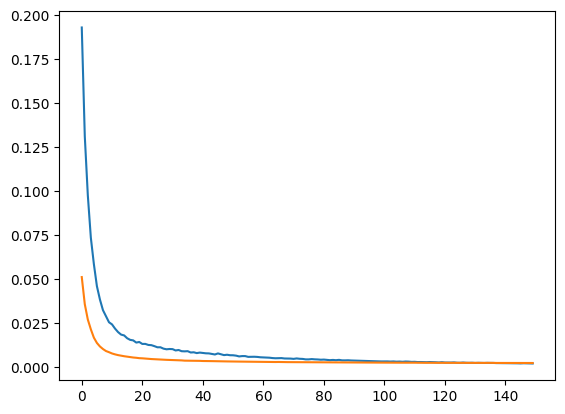

tensor(0.0040)

In [ ]:
### Next?  manually select best model?  ie Plotting?

import numpy as np
import torch

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

mnist = load_digits()
X, y = mnist["data"], mnist["target"]
X = torch.from_numpy(X.astype(dtype='float32'))

# Split into train+val and test
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, torch.from_numpy(y), test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Create TensorDatasets
train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 128 # batchs
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

net = torch.nn.Sequential(
    torch.nn.Linear(8*8, 100),
    torch.nn.ReLU(), # sigmoid?
    torch.nn.Linear(100, 160),
    torch.nn.ReLU(),
    torch.nn.Linear(160, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 10))# Change net structure

optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # adam? lr? momentum?
criterion = torch.nn.CrossEntropyLoss() # MSE, BinaryCross

tr_loss_plot =[]
val_loss_plot = []
for epoch in range(150):
    loss_tr = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_tr+=loss.item()/batch_size
    tr_loss_plot.append(loss_tr)
    loss_val = 0
    with torch.no_grad():
            for features, labels in val_loader:
                outputs = net(features)
                loss_val += criterion(outputs, labels)
            val_loss_plot.append(loss_val)

plt.plot(tr_loss_plot)
plt.plot(val_loss_plot)
plt.show()
val_loss_plot[29]

In [ ]:
list(net.parameters())

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, net.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

2778

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = net(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct/total)

0.9472222222222222


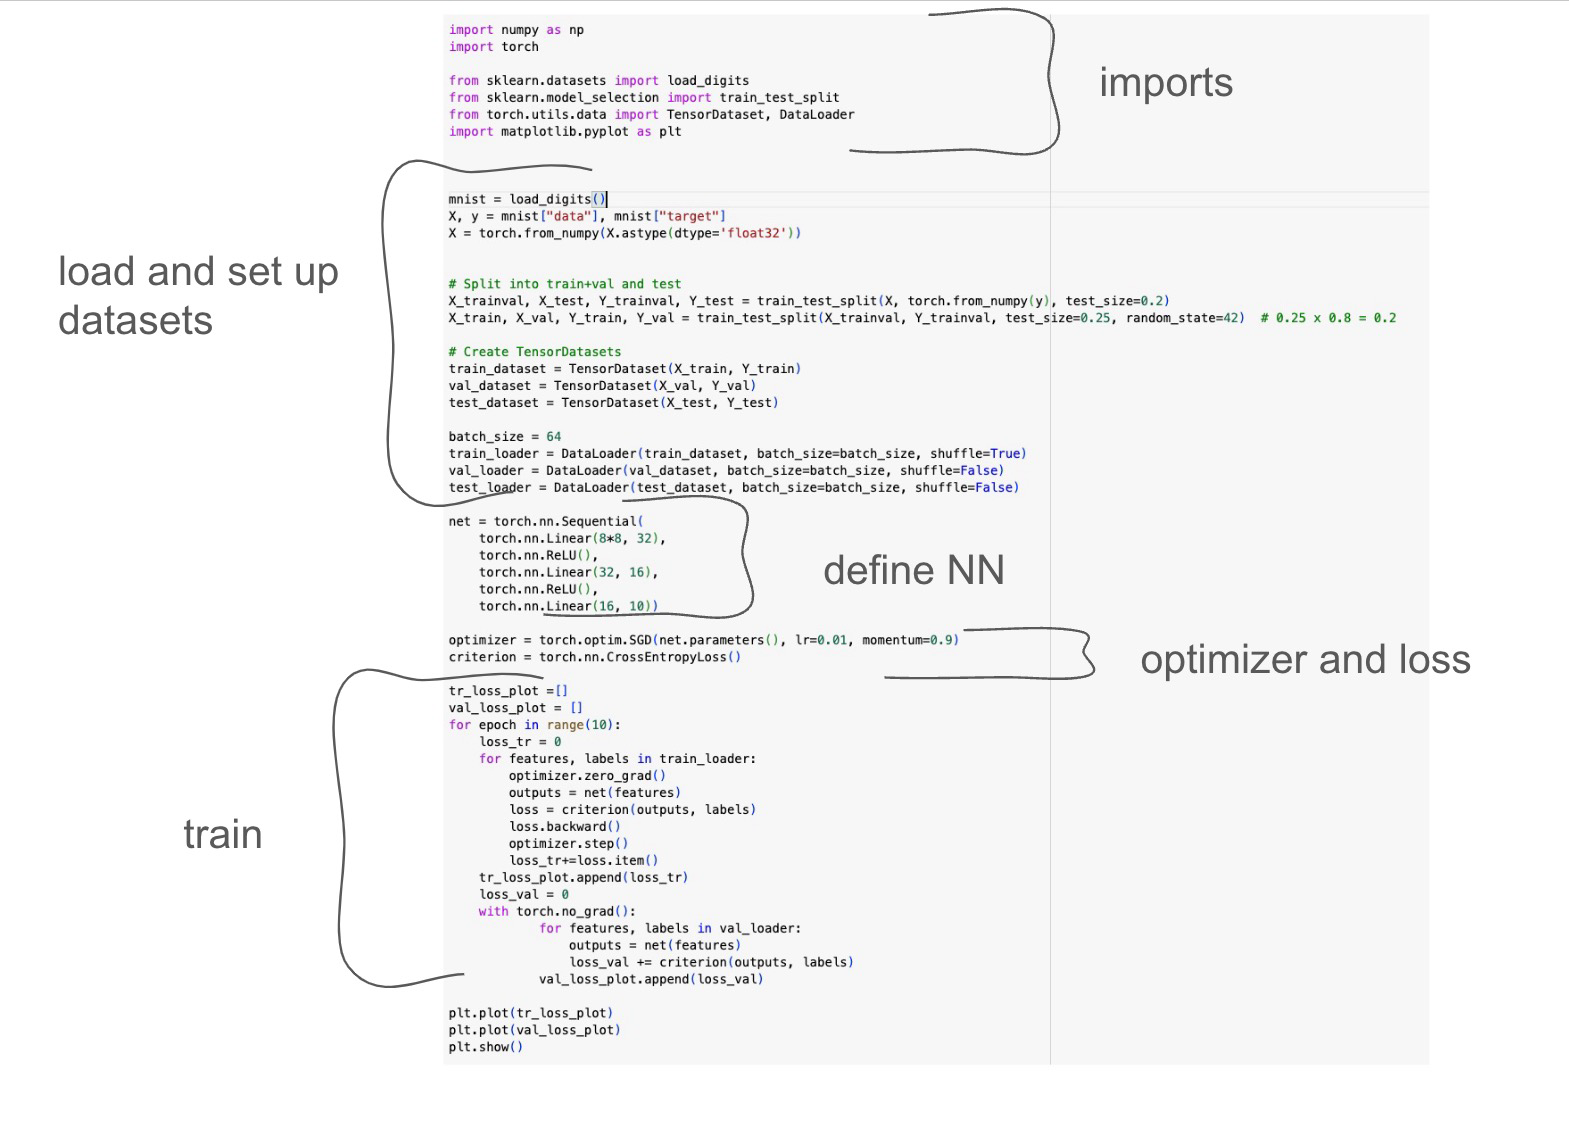

In [ ]:
# 20 eochs is is

net = torch.nn.Sequential(
    torch.nn.Linear(8*8, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10))

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()


for epoch in range(20):
    loss_tr = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_tr+=loss.item()



correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = net(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct/total)

0.9305555555555556
